In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Parameters
total_years = 20
dt = 1/10
time = np.arange(0, total_years, dt)
n = len(time)
nc_per_year = 10
nc = nc_per_year * dt 
nc_arr = np.full(n, nc)  # Create an array of 10s for plotting

# Initialize arrays
total_stock = np.zeros(n)
ret_stock = np.zeros(n)
md_stock = np.zeros(n)
# Substocks within ret_stock
ret_below_baseline_stock = np.zeros(n)
ret_baseline_stock = np.zeros(n)
ret_efficient_stock = np.zeros(n)
# Substocks within md_stock
md_below_baseline_stock = np.zeros(n)
md_baseline_stock = np.zeros(n)
md_efficient_stock = np.zeros(n)
# Create an array of cumulative annual totals for nc
nc_cumulative_annual = np.zeros(n)

# Initial conditions
total_stock[0] = 1000
ret_stock[0] = total_stock[0] * 0.9
md_stock[0] = total_stock[0] * 0.1




# Initial conditions for ret substocks
ret_below_baseline_stock[0] = ret_stock[0] * 0.2
ret_baseline_stock[0] = ret_stock[0] * 0.6
ret_efficient_stock[0] = ret_stock[0] * 0.2


# Initial conditions for md substocks
md_below_baseline_stock[0] = md_stock[0] * 0.4 # this will come from the workpapers and is similar to our current not complete value will need a unit test to verify 100% used in the competition group
md_baseline_stock[0] = md_stock[0] * 0.5
md_efficient_stock[0] = md_stock[0] * 0.1

In [3]:
for t in range(1, n):
    # Add new construction to total stock
    total_stock[t] = total_stock[t-1] + nc

    # Calculate new substocks
    # All md_stock moves to ret_stock, 1/10th of ret_stock becomes md_stock
    # Done at each substock level
    new_md_below_baseline_stock = ret_below_baseline_stock[t-1] * 0.1
    new_ret_below_baseline_stock = (ret_below_baseline_stock[t-1] * 0.9) + md_below_baseline_stock[t-1]

    # All new construction into ret_stocks 
    ret_below_baseline_stock[t] = new_ret_below_baseline_stock + (nc * 0) #(need to proportion nc) 
    md_below_baseline_stock[t] = new_md_below_baseline_stock 

        # Done at each substock level
    new_md_baseline_stock = ret_baseline_stock[t-1] * 0.1
    new_ret_baseline_stock = (ret_baseline_stock[t-1] * 0.9) + md_baseline_stock[t-1]

    # All new construction into ret_stocks 
    ret_baseline_stock[t] = new_ret_baseline_stock + (nc * 0.5) #(need to proportion nc)
    md_baseline_stock[t] = new_md_baseline_stock 

        # Done at each substock level
    new_md_efficient_stock = ret_efficient_stock[t-1] * 0.1
    new_ret_efficient_stock = (ret_efficient_stock[t-1] * 0.9) + md_efficient_stock[t-1]

    # All new construction into ret_stocks 
    ret_efficient_stock[t] = new_ret_efficient_stock + (nc * 0.5) #(need to proportion nc)
    md_efficient_stock[t] = new_md_efficient_stock 

    ret_stock[t] = ret_below_baseline_stock[t] + ret_baseline_stock[t] + ret_efficient_stock[t]
    md_stock[t] = md_below_baseline_stock[t] + md_baseline_stock[t] + md_efficient_stock[t]
    total_stock[t] = md_stock[t] + ret_stock[t]



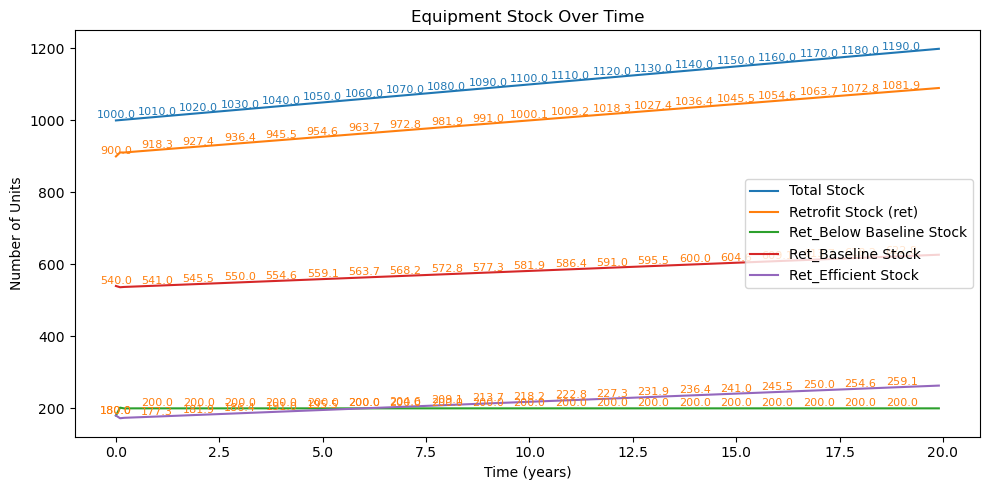

In [4]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(time, total_stock, label="Total Stock")
plt.plot(time, ret_stock, label="Retrofit Stock (ret)")
# plt.plot(time, md_stock, label="Market Driven Stock (md)")
# plt.plot(time, nc_arr, label="New Construction Distrupter (nc)")
# plt.plot(time, nc_cumulative_total, label="Cumulative Annual New Construction (nc)")
plt.plot(time, ret_below_baseline_stock, label="Ret_Below Baseline Stock")
plt.plot(time, ret_baseline_stock, label="Ret_Baseline Stock")
plt.plot(time, ret_efficient_stock, label="Ret_Efficient Stock")
for i in range(0, len(time), 10):
    plt.text(time[i], total_stock[i], f"{total_stock[i]:.1f}", fontsize=8, ha='center', va='bottom', color='tab:blue')
    # plt.text(time[i], md_stock[i], f"{md_stock[i]:.1f}", fontsize=8, ha='center', va='bottom', color='tab:green')
    plt.text(time[i], ret_stock[i], f"{ret_stock[i]:.1f}", fontsize=8, ha='center', va='bottom', color='tab:orange')
    plt.text(time[i], ret_below_baseline_stock[i], f"{ret_below_baseline_stock[i]:.1f}", fontsize=8, ha='center', va='bottom', color='tab:orange')
    plt.text(time[i], ret_baseline_stock[i], f"{ret_baseline_stock[i]:.1f}", fontsize=8, ha='center', va='bottom', color='tab:orange')
    plt.text(time[i], ret_efficient_stock[i], f"{ret_efficient_stock[i]:.1f}", fontsize=8, ha='center', va='bottom', color='tab:orange')
    # plt.text(time[i], nc_arr[i], f"{nc_arr[i]:.1f}", fontsize=8, ha='center', va='bottom', color='tab:red')
    # plt.text(time[i], nc_cumulative_total[i], f"{nc_cumulative_total[i]:.1f}", fontsize=8, ha='center', va='bottom', color='tab:purple')
plt.xlabel("Time (years)")
plt.ylabel("Number of Units")
plt.title("Equipment Stock Over Time")
plt.legend()
plt.tight_layout()
plt.show()